In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

C:\Users\basan\anaconda3\envs\shivam\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Loading the dataset
df = pd.read_csv(r"D:\self project\delhi house prediction\archive\MagicBricks.csv")
df.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


In [3]:
# Checking the shape of the dataset
df.shape


(1259, 11)

In [4]:
# Checking for null/missing values
df.isnull().sum()


Area             0
BHK              0
Bathroom         2
Furnishing       5
Locality         0
Parking         33
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       241
dtype: int64

In [5]:
# Replacing missing value in Per_Sqft
df['Per_Sqft'] = df['Per_Sqft'].fillna(df['Price']/df['Area'])


In [6]:
# Replacing missing values in Parking, Bathroom, Furnishing and Type
df['Parking'].fillna(df['Parking'].mode()[0], inplace=True)
df['Bathroom'].fillna(df['Bathroom'].mode()[0], inplace=True)
df['Furnishing'].fillna(df['Furnishing'].mode()[0], inplace=True)
df['Type'].fillna(df['Type'].mode()[0], inplace=True)

In [7]:
# Checking for missing values
df.isnull().sum()

Area           0
BHK            0
Bathroom       0
Furnishing     0
Locality       0
Parking        0
Price          0
Status         0
Transaction    0
Type           0
Per_Sqft       0
dtype: int64

In [9]:
df.dtypes

Area           float64
BHK              int64
Bathroom       float64
Furnishing      object
Locality        object
Parking        float64
Price            int64
Status          object
Transaction     object
Type            object
Per_Sqft       float64
dtype: object

In [10]:
# Type casting
df[['Parking', 'Bathroom']].astype('int64')

,Parking,Bathroom
0,1,2
1,1,2
2,1,2
3,1,2
4,1,2
...,...,...
1254,3,5
1255,3,2
1256,3,3
1257,1,2


In [11]:
# Unique value count
df.nunique()

Area           315
BHK              8
Bathroom         7
Furnishing       3
Locality       365
Parking          9
Price          284
Status           2
Transaction      2
Type             2
Per_Sqft       433
dtype: int64

In [12]:
# Value count for each value
print(df['Area'].value_counts(),'\n', df['BHK'].value_counts(),'\n', df['Bathroom'])

900.0      67
1500.0     50
1800.0     48
1000.0     42
1600.0     38
           ..
150.0       1
3250.0      1
4000.0      1
5500.0      1
11050.0     1
Name: Area, Length: 315, dtype: int64 
 3     541
2     367
4     220
1      96
5      27
6       6
7       1
10      1
Name: BHK, dtype: int64 
 0       2.0
1       2.0
2       2.0
3       2.0
4       2.0
       ... 
1254    5.0
1255    2.0
1256    3.0
1257    2.0
1258    3.0
Name: Bathroom, Length: 1259, dtype: float64


In [13]:
df['Area_Yards'] = df['Area']/9


In [14]:
# Unique Localities
df['Locality'].unique()


array(['Rohini Sector 25', 'J R Designers Floors, Rohini Sector 24',
       'Citizen Apartment, Rohini Sector 13', 'Rohini Sector 24',
       'Rohini Sector 24 carpet area 650 sqft status Ready to Move floor 4 out of 4 floors transaction New Property furnishing Semi-Furnished facing East overlooking Garden/Park, Main Road car parking 1 Open bathroom 2 balcony 1 ownership Freehold Newly Constructed Property Newly Constructed Property East Facing Property 2BHK Newly build property for Sale. A House is waiting for a Friendly Family to make it a lovely home.So please come and make his house feel alive once again. read more Contact Agent View Phone No. Share Feedback Garima properties Certified Agent Trusted by Users Genuine Listings Market Knowledge',
       'Delhi Homes, Rohini Sector 24', 'Rohini Sector 21',
       'Rohini Sector 22', 'Rohini Sector 20',
       'Rohini Sector 8 How Auctions work? The borrower has the physical possession of the Property. However the lender (Bank) can lega

In [16]:
def grp_local(locality):
    locality = locality.lower() # avoid case sensitive
    if 'rohini' in locality:
        return 'Rohini Sector'
    elif 'dwarka' in locality:
        return 'Dwarka Sector'
    elif 'shahdara' in locality:
        return 'Shahdara'
    elif 'vasant' in locality:
        return 'Vasant Kunj'
    elif 'paschim' in locality:
        return 'Paschim Vihar'
    elif 'alaknanda' in locality:
        return 'Alaknanda'
    elif 'vasundhar' in locality:
        return 'Vasundhara Enclave'
    elif 'punjabi' in locality:
        return 'Punjabi Bagh'
    elif 'kalkaji' in locality:
        return 'Kalkaji'
    elif 'lajpat' in locality:
        return 'Lajpat Nagar'
    else:
        return 'Other'
df['Locality'] = df['Locality'].apply(grp_local)

In [17]:
df['Locality'].value_counts()

Other                 716
Lajpat Nagar           90
Dwarka Sector          87
Rohini Sector          75
Shahdara               75
Alaknanda              58
Vasant Kunj            35
Kalkaji                32
Punjabi Bagh           31
Paschim Vihar          30
Vasundhara Enclave     30
Name: Locality, dtype: int64

In [18]:
# Using Z - score to remove outliers
from scipy import stats
# Z score
z = np.abs(stats.zscore(df[df.dtypes[df.dtypes != 'object'].index]))
# Removing outliers
df = df[(z < 3).all(axis=1)]


In [19]:
#Checking descriptive satistics of the data
df.describe()

,Area,BHK,Bathroom,Parking,Price,Per_Sqft,Area_Yards
count,1189.000000,1189.000000,1189.000000,1189.000000,1.189000e+03,1189.000000,1189.000000
mean,1296.421567,2.735913,2.483600,1.410429,1.852459e+07,12629.785274,144.046841
std,750.284776,0.859232,0.952107,0.719913,1.772598e+07,8434.085021,83.364975
min,28.000000,1.000000,1.000000,1.000000,1.000000e+06,1250.000000,3.111111
25%,800.000000,2.000000,2.000000,1.000000,5.510000e+06,6526.000000,88.888889
50%,1150.000000,3.000000,2.000000,1.000000,1.350000e+07,10943.000000,127.777778
75%,1600.000000,3.000000,3.000000,2.000000,2.490000e+07,16584.000000,177.777778
max,5220.000000,5.000000,5.000000,10.000000,9.300000e+07,72000.000000,580.000000


In [20]:
df.head(10)

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft,Area_Yards
0,800.0,3,2.0,Semi-Furnished,Rohini Sector,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,8125.0,88.888889
1,750.0,2,2.0,Semi-Furnished,Rohini Sector,1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0,83.333333
2,950.0,2,2.0,Furnished,Rohini Sector,1.0,15500000,Ready_to_move,Resale,Apartment,6667.0,105.555556
3,600.0,2,2.0,Semi-Furnished,Rohini Sector,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0,66.666667
4,650.0,2,2.0,Semi-Furnished,Rohini Sector,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0,72.222222
5,1300.0,4,3.0,Semi-Furnished,Rohini Sector,1.0,15500000,Ready_to_move,New_Property,Builder_Floor,6667.0,144.444444
6,1350.0,4,3.0,Semi-Furnished,Rohini Sector,1.0,10000000,Ready_to_move,Resale,Builder_Floor,6667.0,150.000000
7,650.0,2,2.0,Semi-Furnished,Rohini Sector,1.0,4000000,Ready_to_move,New_Property,Apartment,6154.0,72.222222
8,985.0,3,3.0,Unfurnished,Rohini Sector,1.0,6800000,Almost_ready,New_Property,Builder_Floor,6154.0,109.444444
9,1300.0,4,4.0,Semi-Furnished,Rohini Sector,1.0,15000000,Ready_to_move,New_Property,Builder_Floor,6154.0,144.444444


Text(0.5, 1.0, 'Area in Yards')

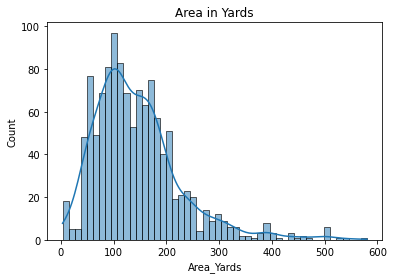

In [22]:
sns.histplot(x = df['Area_Yards'], kde = True, bins = 50).set_title('Area in Yards')

Text(0.5, 1.0, 'BHK')

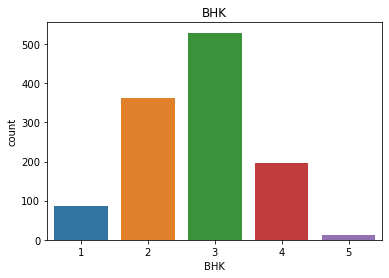

In [23]:
sns.countplot(x = 'BHK', data = df).set_title('BHK')


Text(0.5, 1.0, 'Bathroom')

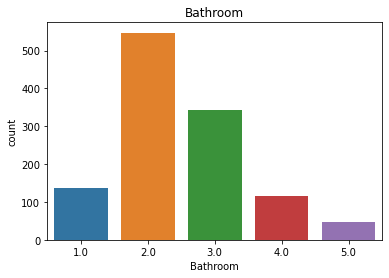

In [24]:
sns.countplot(x = 'Bathroom', data = df).set_title('Bathroom')


Text(0.5, 1.0, 'Furnishing')

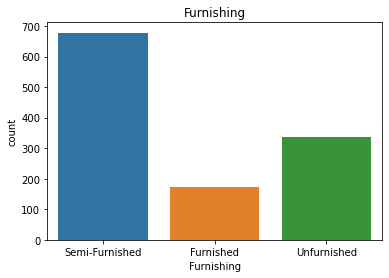

In [25]:
sns.countplot(x='Furnishing',data=df).set_title('Furnishing')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Rohini Sector'),
  Text(1, 0, 'Lajpat Nagar'),
  Text(2, 0, 'Dwarka Sector'),
  Text(3, 0, 'Other'),
  Text(4, 0, 'Vasant Kunj'),
  Text(5, 0, 'Shahdara'),
  Text(6, 0, 'Paschim Vihar'),
  Text(7, 0, 'Alaknanda'),
  Text(8, 0, 'Vasundhara Enclave'),
  Text(9, 0, 'Punjabi Bagh'),
  Text(10, 0, 'Kalkaji')])

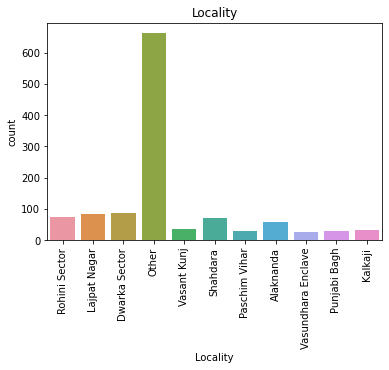

In [26]:
sns.countplot(x = 'Locality', data = df).set_title('Locality')
plt.xticks(rotation = 90)

Text(0.5, 1.0, 'Parking')

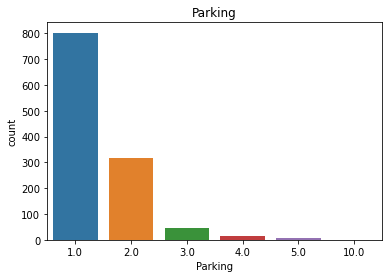

In [27]:
sns.countplot(x = 'Parking', data = df).set_title('Parking')

Text(0.5, 1.0, 'Status of the Property')

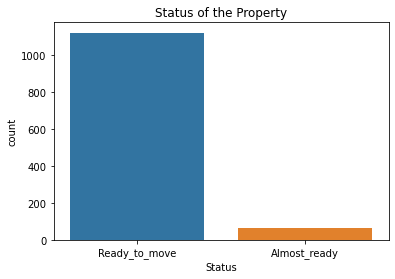

In [28]:
sns.countplot(x = 'Status', data = df).set_title('Status of the Property')

Text(0.5, 1.0, 'Transaction Type')

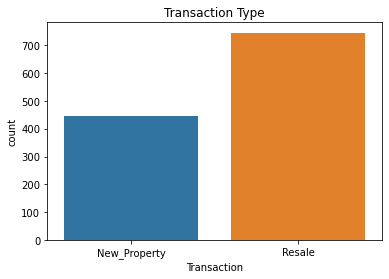

In [30]:
sns.countplot(x='Transaction', data=df).set_title('Transaction Type')


Text(0.5, 1.0, 'Type of House')

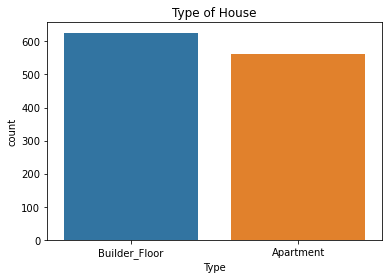

In [31]:
sns.countplot(x='Type',data=df).set_title('Type of House')

<AxesSubplot:xlabel='Area_Yards', ylabel='Price'>

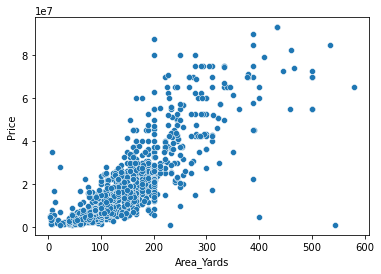

In [32]:
sns.scatterplot(x = 'Area_Yards', y = 'Price', data = df)

Text(0.5, 1.0, 'BHK vs Price')

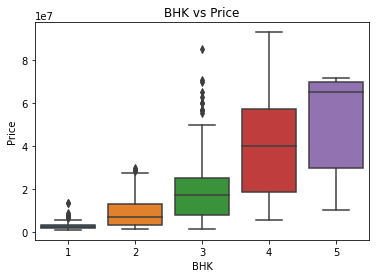

In [33]:
sns.boxplot(x = 'BHK', y = 'Price', data = df).set_title('BHK vs Price')

Text(0.5, 1.0, 'Bathroom vs Price')

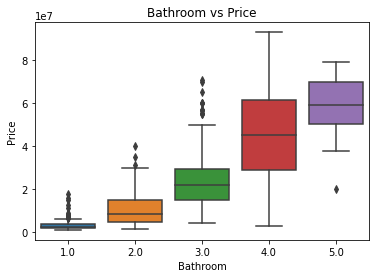

In [34]:
sns.boxplot(x = 'Bathroom', y = 'Price', data = df).set_title('Bathroom vs Price')

Text(0.5, 1.0, 'Parking vs Price')

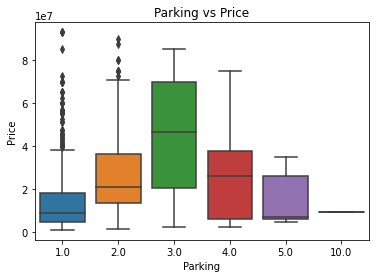

In [35]:
sns.boxplot(x = 'Parking', y = 'Price', data = df).set_title('Parking vs Price')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Rohini Sector'),
  Text(1, 0, 'Lajpat Nagar'),
  Text(2, 0, 'Dwarka Sector'),
  Text(3, 0, 'Other'),
  Text(4, 0, 'Vasant Kunj'),
  Text(5, 0, 'Shahdara'),
  Text(6, 0, 'Paschim Vihar'),
  Text(7, 0, 'Alaknanda'),
  Text(8, 0, 'Vasundhara Enclave'),
  Text(9, 0, 'Punjabi Bagh'),
  Text(10, 0, 'Kalkaji')])

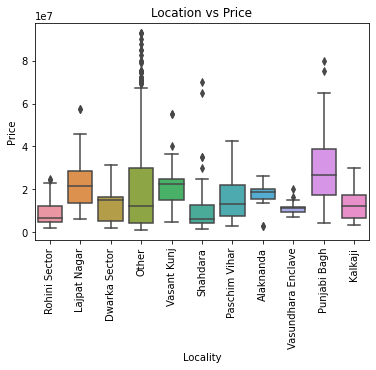

In [36]:
sns.boxplot(x='Locality', y='Price', data=df).set_title('Location vs Price')
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Furnishing vs price')

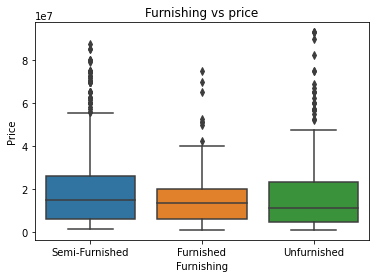

In [37]:
sns.boxplot(x = 'Furnishing', y = 'Price', data = df).set_title('Furnishing vs price')

Text(0.5, 1.0, 'Price vs Status')

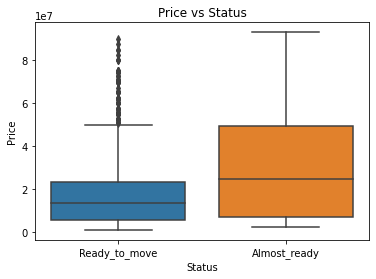

In [38]:
sns.boxplot(x = 'Status', y = 'Price', data = df).set_title('Price vs Status')

Text(0.5, 1.0, 'Transaction vs price')

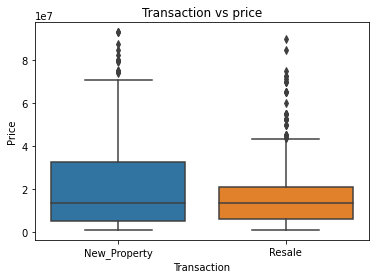

In [39]:
sns.boxplot(x = 'Transaction', y = 'Price', data = df).set_title('Transaction vs price')

Text(0.5, 1.0, 'Price vs Type')

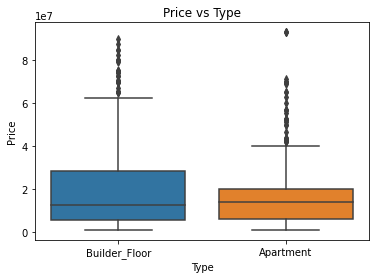

In [40]:
sns.boxplot(x = 'Type', y = 'Price', data = df).set_title('Price vs Type')

In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# Columns for label encoding
cols = ['Furnishing', 'Locality', 'Status', 'Transaction', 'Type']
for i in cols:
 le.fit(df[i])
 df[i] = le.transform(df[i])
 print(i, df[i].unique())

Furnishing [1 0 2]
Locality [ 7  3  1  4  9  8  5  0 10  6  2]
Status [1 0]
Transaction [0 1]
Type [1 0]


In [44]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
df[['Area', 'Price', 'Per_Sqft', 'Area_Yards']] = MinMaxScaler().fit_transform(df[['Area', 'Price', 'Per_Sqft', 'Area_Yards']])

In [45]:
df.head()

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft,Area_Yards
0,0.148690,3,2.0,1,7,1.0,0.059783,1,0,1,0.097173,0.148690
1,0.139060,2,2.0,1,7,1.0,0.043478,1,0,0,0.076565,0.139060
2,0.177581,2,2.0,0,7,1.0,0.157609,1,1,0,0.076565,0.177581
3,0.110169,2,2.0,1,7,1.0,0.034783,1,1,1,0.076565,0.110169
4,0.119800,2,2.0,1,7,1.0,0.056522,1,0,1,0.076565,0.119800


<AxesSubplot:>

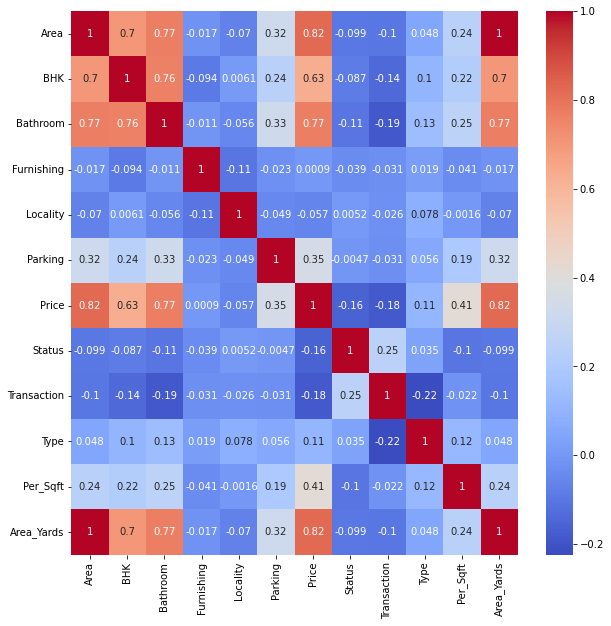

In [46]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [47]:
# Dropping Per_Sqft column
df.drop(['Per_Sqft'],axis=1,inplace=True)

In [50]:
X =df.drop('Price',axis=1)
y=df['Price']

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)


In [52]:
from sklearn.tree import DecisionTreeRegressor
#creating Decision Tree Regressor object
dtr = DecisionTreeRegressor()

In [55]:
from sklearn.model_selection import GridSearchCV

# Defining parameters
parameters = {'max_depth':[2,4,6,8],
              'min_samples_split':[2,4,6,8],
              'min_samples_leaf':[1,2,3,4],
              'max_features':['auto','sqrt','log2'],
              'random_state':[0,42]}

# Creating GridSearchCV object
grid_search = GridSearchCV(dtr, parameters, cv=5, scoring='neg_mean_squared_error')

# Fitting data to grid search object
grid_search.fit(X_train, y_train)

# Best parameters
print("Best parameters: ", grid_search.best_params_)


C:\Users\basan\anaconda3\envs\shivam\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\basan\anaconda3\envs\shivam\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\basan\anaconda3\envs\shivam\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
C:\Users\basan\anaconda3\envs\shivam\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_f

Best parameters:  {'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 6, 'random_state': 42}


In [57]:
dtr = DecisionTreeRegressor( max_depth=8, max_features='auto', min_samples_leaf=2, min_samples_split=6, random_state=42)
dtr

DecisionTreeRegressor(max_depth=8, max_features='auto', min_samples_leaf=2,
                      min_samples_split=6, random_state=42)

In [58]:
# Training the model
dtr.fit(X_train, y_train)

C:\Users\basan\anaconda3\envs\shivam\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


DecisionTreeRegressor(max_depth=8, max_features='auto', min_samples_leaf=2,
                      min_samples_split=6, random_state=42)

In [59]:
# Training Accuracy
dtr.score(X_train, y_train)

0.8934660919317086

In [60]:
# Predicting the house price
d_pred = dtr.predict(X_test)

In [61]:
dft = pd.DataFrame({'Actual': y_test, 'Predicted': d_pred})
dft.reset_index(drop=True, inplace=True)
dft.head(10)

,Actual,Predicted
0,0.030435,0.059672
1,0.076087,0.059672
2,0.217391,0.197471
3,0.125000,0.061999
4,0.020652,0.021307
5,0.059783,0.358424
6,0.184783,0.197471
7,0.016304,0.014017
8,0.021087,0.061999
9,0.013043,0.021307


C:\Users\basan\AppData\Local\Temp\ipykernel_5424\1402723017.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dft['Actual'], color = 'r', label = 'Actual Price', hist = False)
C:\Users\basan\AppData\Local\Temp\ipykernel_5424\1402723017.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.d

<AxesSubplot:xlabel='Predicted', ylabel='Density'>

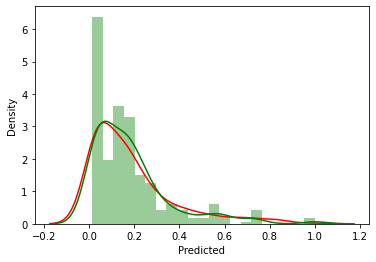

In [62]:
ax = sns.distplot(dft['Actual'], color = 'r', label = 'Actual Price', hist = False)
sns.distplot(dft['Predicted'], color = 'g', label = 'Predicted Price', ax=ax)

In [66]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print("R2 Score: ", r2_score(y_test, d_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, d_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, d_pred))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, d_pred)))


R2 Score:  0.7384252239694415
Mean Squared Error:  0.009121514585327773
Mean Absolute Error:  0.05789143383504195
Root Mean Squared Error:  0.09550662063609922


In [67]:
from sklearn.ensemble import RandomForestRegressor
# Random Forest Regressor Object
rfr = RandomForestRegressor()
rfr

RandomForestRegressor()

In [68]:
 # Training the model
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [69]:
# Training Accuracy
rfr.score(X_train, y_train)

0.9593459088653284

In [70]:
# Predicting the house price
r_pred = rfr.predict(X_test)

In [71]:
dfr = pd.DataFrame({'Actual': y_test, 'Predicted': r_pred})
dfr.reset_index(drop=True, inplace=True)
dfr.head(10)


,Actual,Predicted
0,0.030435,0.054401
1,0.076087,0.111731
2,0.217391,0.205858
3,0.125000,0.083865
4,0.020652,0.029403
5,0.059783,0.286604
6,0.184783,0.166120
7,0.016304,0.011593
8,0.021087,0.047051
9,0.013043,0.013619


C:\Users\basan\AppData\Local\Temp\ipykernel_5424\1723587626.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dfr['Actual'], color = 'r', label = 'Actual Price', hist = False)
C:\Users\basan\AppData\Local\Temp\ipykernel_5424\1723587626.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.d

<AxesSubplot:xlabel='Predicted', ylabel='Density'>

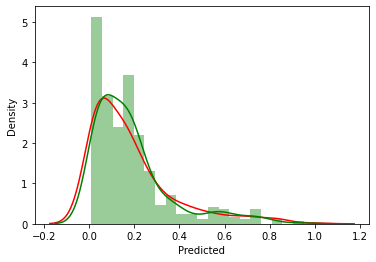

In [72]:
ax = sns.distplot(dfr['Actual'], color = 'r', label = 'Actual Price', hist = False)
sns.distplot(dfr['Predicted'], color = 'g', label = 'Predicted Price', ax=ax)

In [73]:
print("R2 Score: ", r2_score(y_test, r_pred))
print("Mean Squared Error: ", mean_squared_error(y_test, r_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, r_pred))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, r_pred)))


R2 Score:  0.8329326701991884
Mean Squared Error:  0.005825894639519211
Mean Absolute Error:  0.047162683740162734
Root Mean Squared Error:  0.07632754836570614
